In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input, BatchNormalization, Concatenate, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [62]:
mainDIR = os.listdir('./chest_xray')
print(mainDIR)

train_folder = './chest_xray/train/'
val_folder = './chest_xray/val/'
test_folder = './chest_xray/test'

# train
os.listdir(train_folder)
train_n = train_folder + 'NORMAL/'
train_p = train_folder + 'PNEUMONIA/'

# Normal pic
print(len(os.listdir(train_n)))
rand_norm = np.random.randint(0, len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ', norm_pic)
norm_pic_address = train_n + norm_pic


# Pneumonia
rand_p = np.random.randint(0, len(os.listdir(train_p)))
sic_pic = os.listdir(train_p)[rand_norm]
sic_address = train_p + sic_pic
print('pneumonia picture title: ', sic_pic)

['test', 'val', 'train']
1341
normal picture title:  NORMAL2-IM-0945-0001.jpeg
pneumonia picture title:  person371_bacteria_1696.jpeg


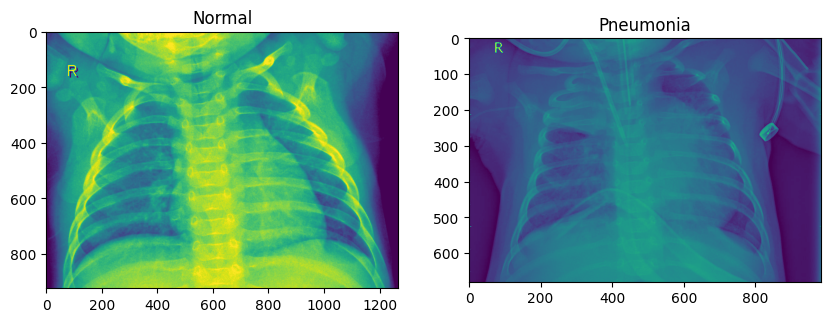

In [64]:
# Load the image
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these image
f = plt.figure(figsize=(10, 6))

a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1,2,2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')
plt.show()

In [80]:
cnn = tf.keras.Sequential()

model_in = Input(shape = (64, 64, 3))
model = Flatten()(model_in)
model=Dense(activation='relu', units = 1028)(model)
model=Dense(activation='relu', units = 128)(model)
model=Dense(activation='softmax', units = 1)(model)

model_fin = Model(inputs=model_in, outputs=model)
model_fin.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_fin.summary()

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_30 (InputLayer)     │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_38 (Flatten)            │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1028)           │    12,633,092 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 128)            │       131,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,764,933 (48.69 MB)

 Trainable params: 12,764,933 (48.69 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
num_of_test_samples = 600
batch_size = 32
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255) #Image normalization.

training_set = train_datagen.flow_from_directory('./chest_xray/train', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [82]:
validation_generator = test_datagen.flow_from_directory('./chest_xray/val/', target_size=(64, 64), batch_size=32, class_mode='binary')
test_set = test_datagen.flow_from_directory( './chest_xray/test', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

model_fin.summary()

Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_30 (InputLayer)     │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_38 (Flatten)            │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1028)           │    12,633,092 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 128)            │       131,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,764,933 (48.69 MB)

 Trainable params: 12,764,933 (48.69 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
!pip install scipy

In [84]:
cnn_model = model_fin.fit(training_set,steps_per_epoch = 163,epochs = 10,validation_data = validation_generator,validation_steps = 624)

test_accu = model_fin.evaluate(test_set,steps=624)

model_fin.save('medical_ann.h5')
print('The testing accuracy is :',test_accu[1]*100, '%')
Y_pred = model_fin.predict(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)

max(y_pred)

Epoch 1/10


/home/ubuntu/workdir/.venv/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/home/ubuntu/workdir/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 38s 221ms/step - accuracy: 0.7308 - loss: 2.0887 - val_accuracy: 0.5000 - val_loss: 0.9686
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.9686
Epoch 3/10


2024-05-29 17:31:12.171058: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-05-29 17:31:12.181964: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:31:12.269348: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 37s 218ms/step - accuracy: 0.7379 - loss: 0.3459 - val_accuracy: 0.5000 - val_loss: 0.5010
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.5010
Epoch 5/10


2024-05-29 17:31:49.034471: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:31:49.041929: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:31:49.128329: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 36s 218ms/step - accuracy: 0.7351 - loss: 0.3090 - val_accuracy: 0.5000 - val_loss: 0.5019
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.5019
Epoch 7/10


2024-05-29 17:32:25.524546: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:32:25.532193: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:32:25.615143: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 36s 217ms/step - accuracy: 0.7439 - loss: 0.2738 - val_accuracy: 0.5000 - val_loss: 0.5193
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.5193
Epoch 9/10


2024-05-29 17:33:01.924140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:33:01.932001: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:33:02.018556: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 36s 217ms/step - accuracy: 0.7387 - loss: 0.2717 - val_accuracy: 0.5000 - val_loss: 1.1522
Epoch 10/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.1522


2024-05-29 17:33:38.518395: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:33:38.525160: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 17:33:38.605065: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6257 - loss: 0.8248    


2024-05-29 17:33:40.815923: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


The testing accuracy is : 62.5 %
 2/20 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step 

/home/ubuntu/workdir/.venv/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step


0

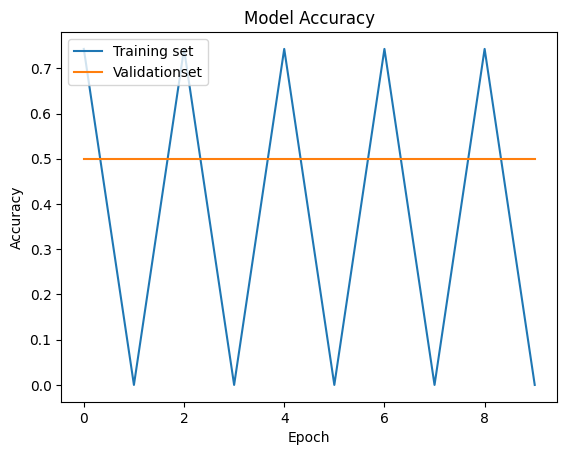

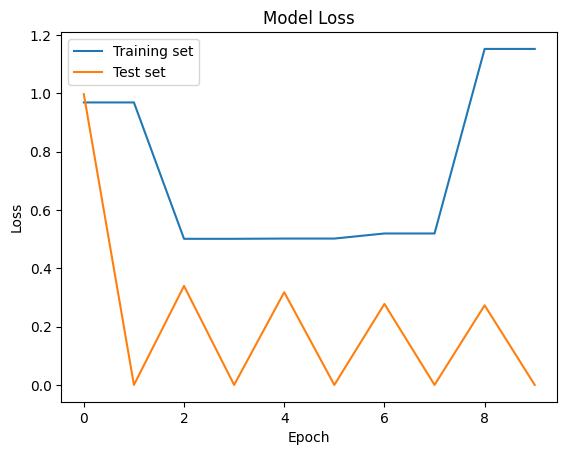

<Figure size 640x480 with 0 Axes>

In [85]:
# Accuracy
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validationset'], loc='upper left')
plt.savefig('train_accuracy.png')
plt.show(block=False)
plt.clf()

# Loss
plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'],loc='upper left')
plt.savefig('train_loss.png')
plt.show(block=False)
plt.clf()